In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-target-marketing/Bank Target Marketing Dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/bank-target-marketing/Bank Target Marketing Dataset.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

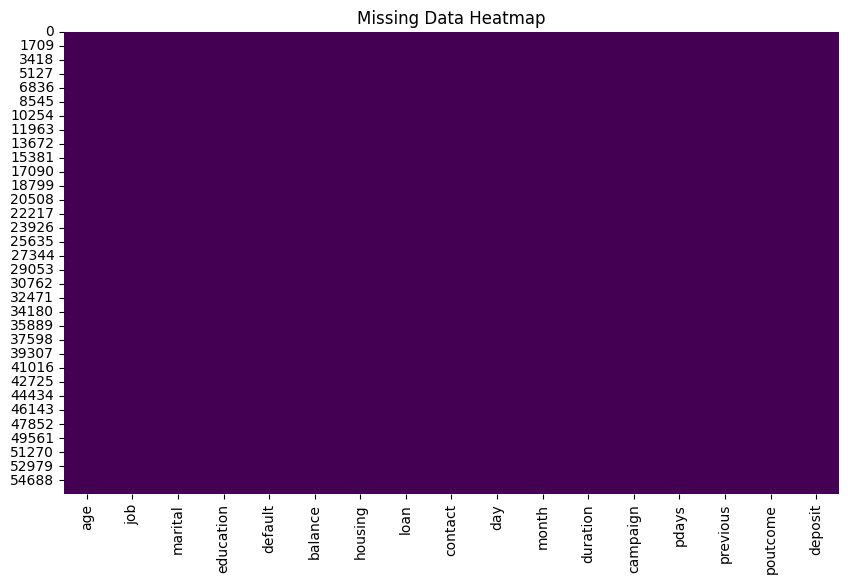

In [5]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [6]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Average Balance by Job

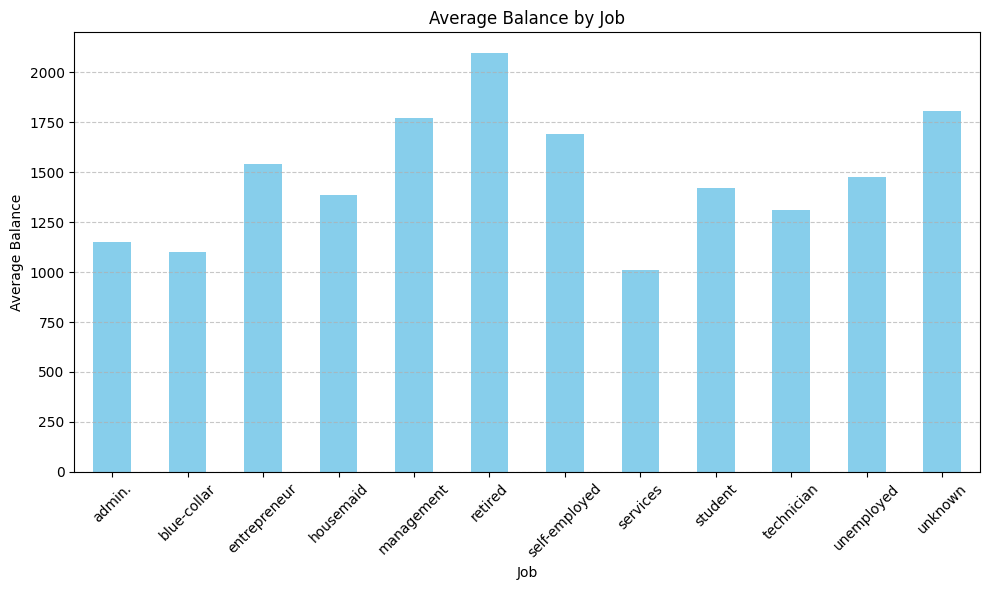

In [7]:
# Calculate average balance for each job category
average_balance_by_job = df.groupby('job')['balance'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_balance_by_job.plot(kind='bar', color='skyblue')
plt.title('Average Balance by Job')
plt.xlabel('Job')
plt.ylabel('Average Balance')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribution of Marital Status

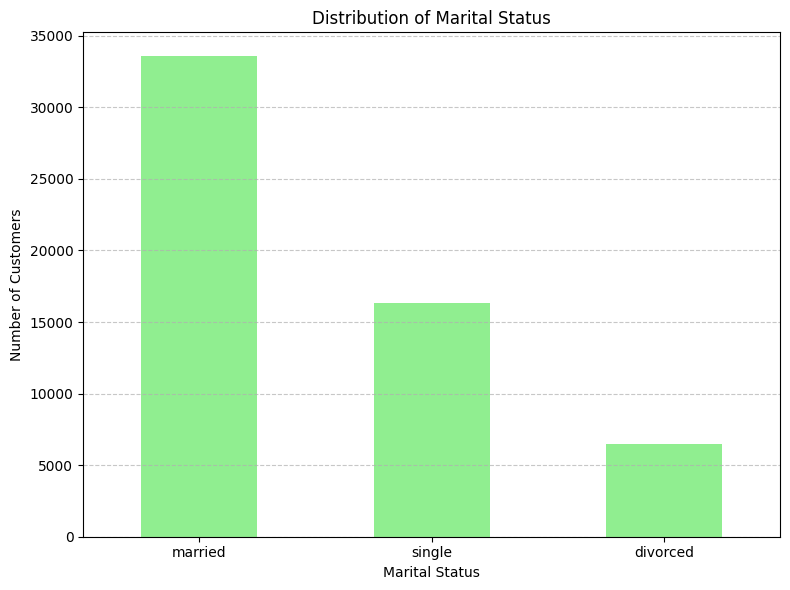

In [8]:
# Calculate distribution of customers based on marital status
marital_distribution = df['marital'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
marital_distribution.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Education Level Distribution

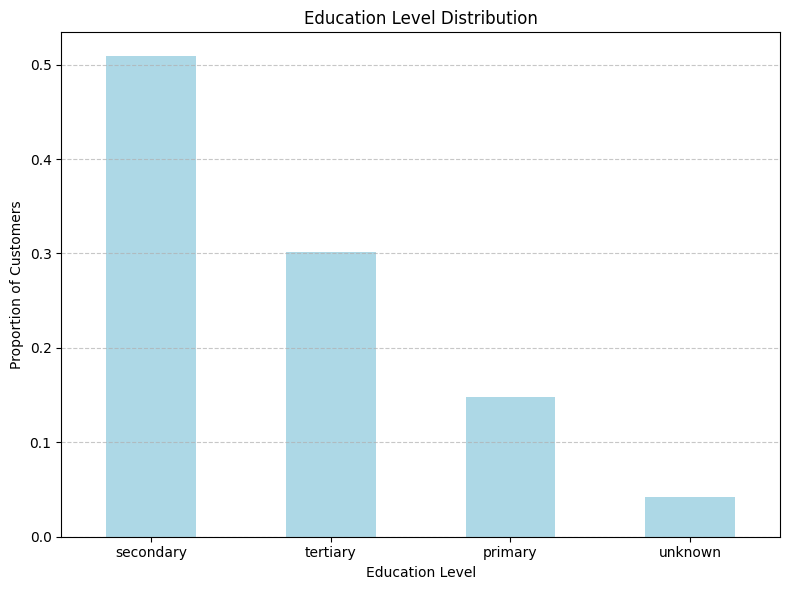

In [9]:
# Calculate proportion of customers with different education levels
education_distribution = df['education'].value_counts(normalize=True)

# Plotting
plt.figure(figsize=(8, 6))
education_distribution.plot(kind='bar', color='lightblue')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

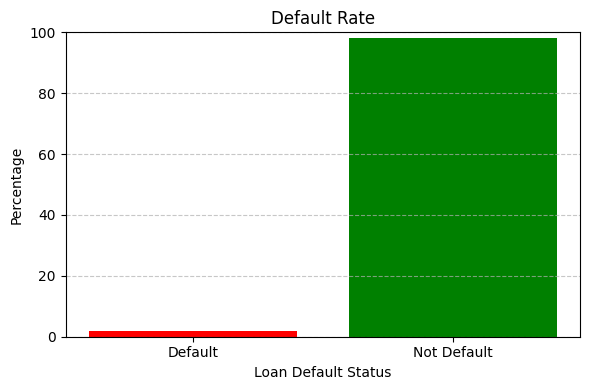

In [10]:
# Calculate default rate
default_rate = (df['default'] == 'yes').mean() * 100

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Default', 'Not Default'], [default_rate, 100 - default_rate], color=['red', 'green'])
plt.title('Default Rate')
plt.xlabel('Loan Default Status')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Home Ownership Status

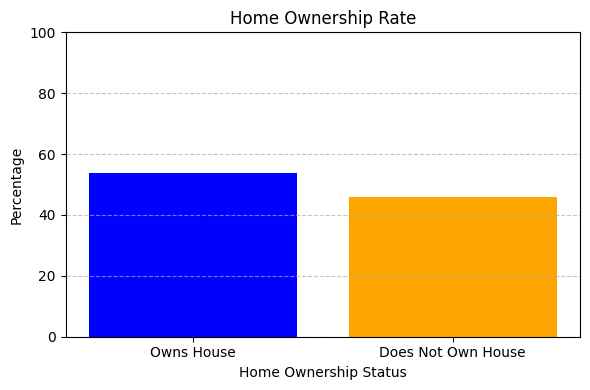

Home Ownership Rate: 53.95%


In [11]:
# Calculate home ownership rate
home_ownership_rate = (df['housing'] == 'yes').mean() * 100

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(['Owns House', 'Does Not Own House'], [home_ownership_rate, 100 - home_ownership_rate], color=['blue', 'orange'])
plt.title('Home Ownership Rate')
plt.xlabel('Home Ownership Status')
plt.ylabel('Percentage')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Home Ownership Rate: {:.2f}%".format(home_ownership_rate))

# Loan Acceptance Rate by Job

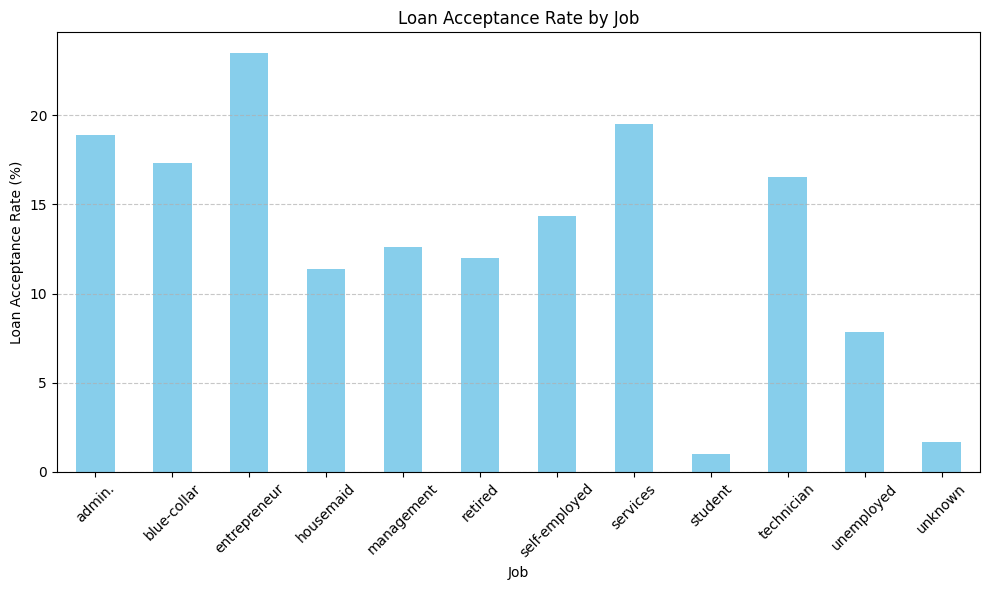

In [12]:
# Calculate loan acceptance rate by job category
loan_acceptance_rate_by_job = df.groupby('job')['loan'].apply(lambda x: (x == 'yes').mean() * 100)

# Plotting
plt.figure(figsize=(10, 6))
loan_acceptance_rate_by_job.plot(kind='bar', color='skyblue')
plt.title('Loan Acceptance Rate by Job')
plt.xlabel('Job')
plt.ylabel('Loan Acceptance Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Contact Channel Usage

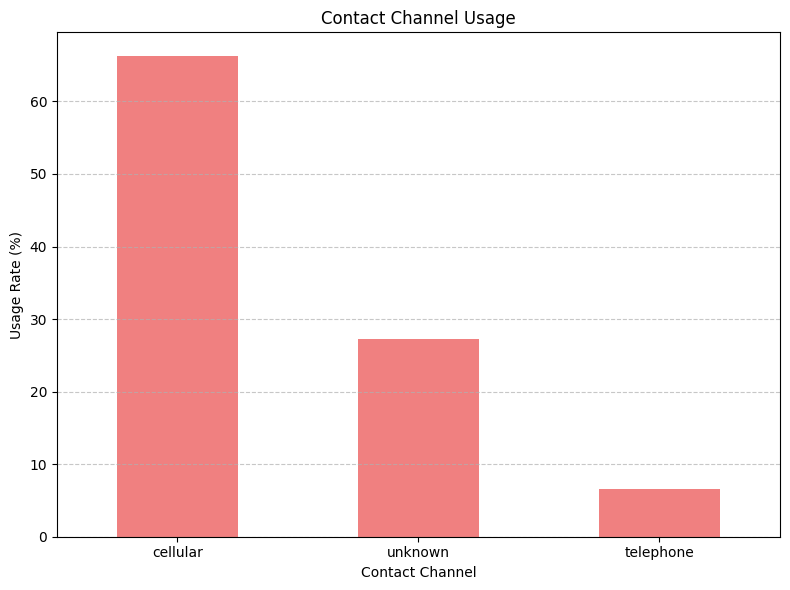

In [13]:
# Calculate contact channel usage
contact_channel_usage = df['contact'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))
contact_channel_usage.plot(kind='bar', color='lightcoral')
plt.title('Contact Channel Usage')
plt.xlabel('Contact Channel')
plt.ylabel('Usage Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Campaign Success Rate by Contact Channel

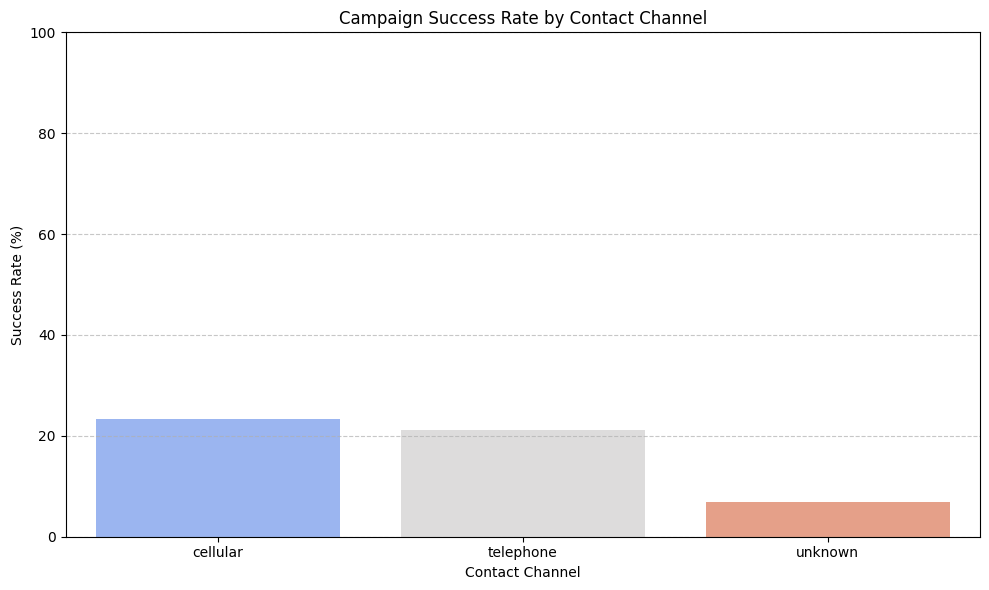

In [14]:
success_by_contact = df.groupby('contact')['deposit'].apply(lambda x: (x == 'yes').mean() * 100).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='contact', y='deposit', data=success_by_contact, palette='coolwarm')
plt.title('Campaign Success Rate by Contact Channel')
plt.xlabel('Contact Channel')
plt.ylabel('Success Rate (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Boxplot of Contact Duration by Contact Channel

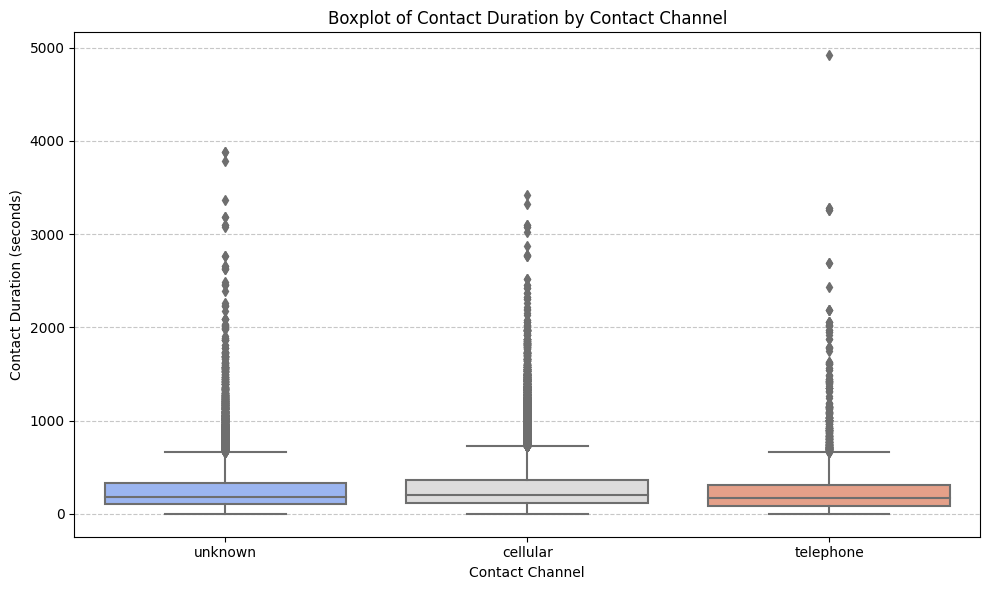

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='contact', y='duration', data=df, palette='coolwarm')
plt.title('Boxplot of Contact Duration by Contact Channel')
plt.xlabel('Contact Channel')
plt.ylabel('Contact Duration (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

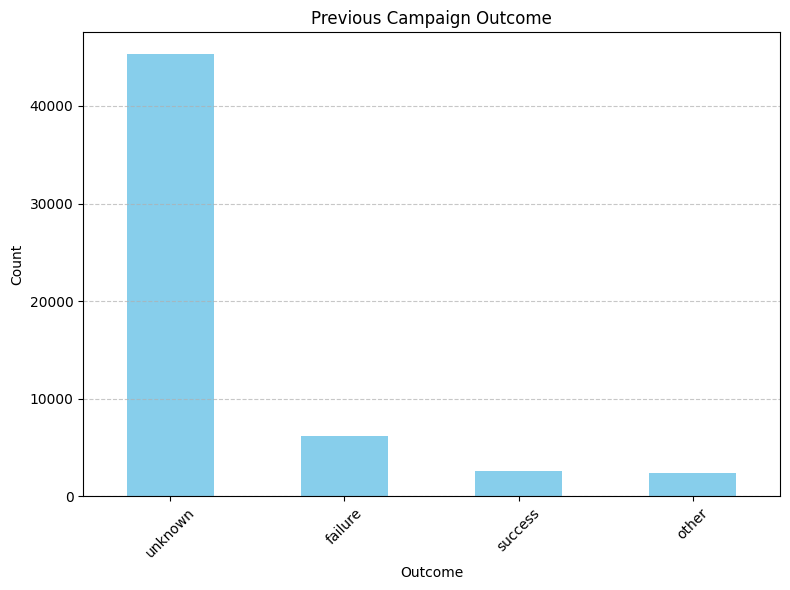

In [16]:
# Calculate distribution of previous campaign outcomes
previous_campaign_outcome_distribution = df['poutcome'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
previous_campaign_outcome_distribution.plot(kind='bar', color='skyblue')
plt.title('Previous Campaign Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Deposit Rate by Age Group

/tmp/ipykernel_18/3445505065.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deposit_rate_by_age_group = df.groupby('age_group')['deposit'].apply(lambda x: (x == 'yes').mean() * 100)


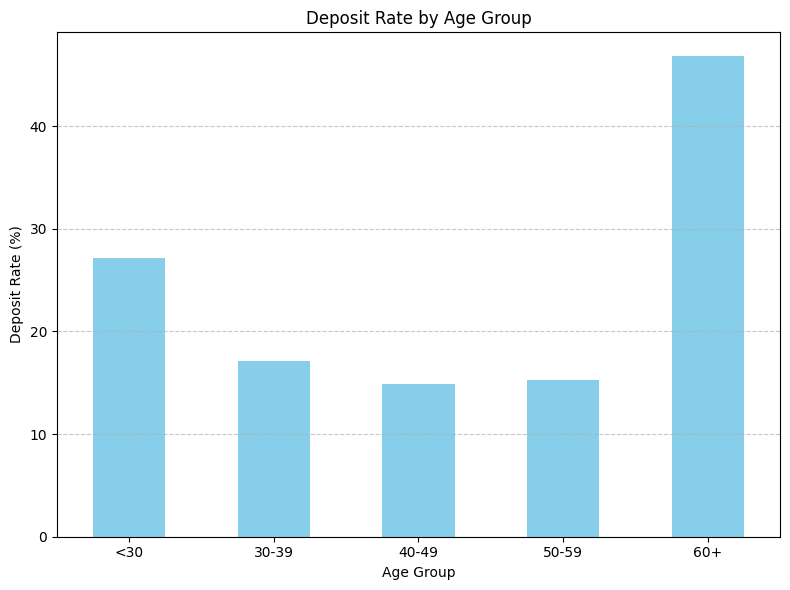

In [17]:
# Define age groups
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate deposit rate by age group
deposit_rate_by_age_group = df.groupby('age_group')['deposit'].apply(lambda x: (x == 'yes').mean() * 100)

# Plotting
plt.figure(figsize=(8, 6))
deposit_rate_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Deposit Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Deposit Rate (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

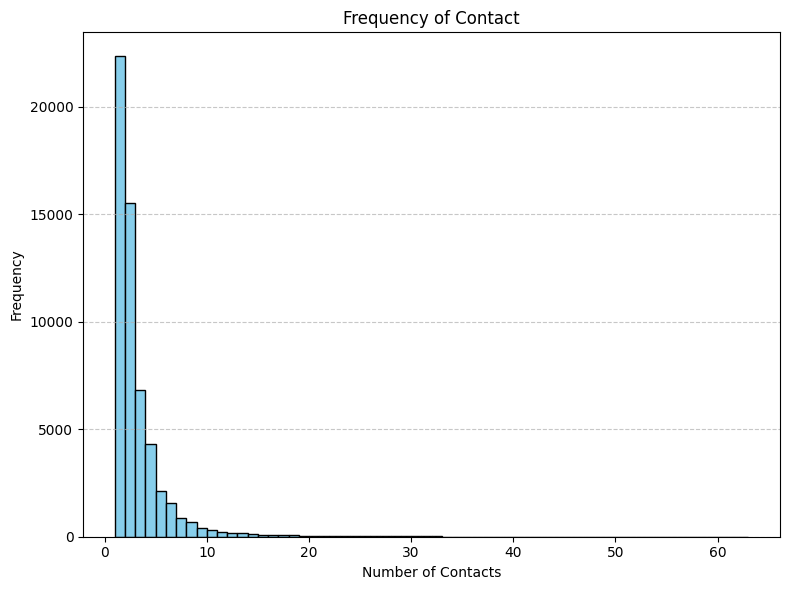

In [18]:
# Plotting
plt.figure(figsize=(8, 6))
plt.hist(df['campaign'], bins=range(1, df['campaign'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Frequency of Contact')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()